In [7]:
import pandas as pd
import numpy as np

# Read in the data
stack_overflow = pd.read_feather('stack_overflow.feather')

xbar_yes = 2715.6721311475408
xbar_no = 1897.7912673056444
s_yes = 2544.688210903328
s_no = 3154.0395070841687
n_yes = 61
n_no = 939

# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

2.3936661778766433


In [9]:
from scipy.stats import t

t_stat = -t_stat

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


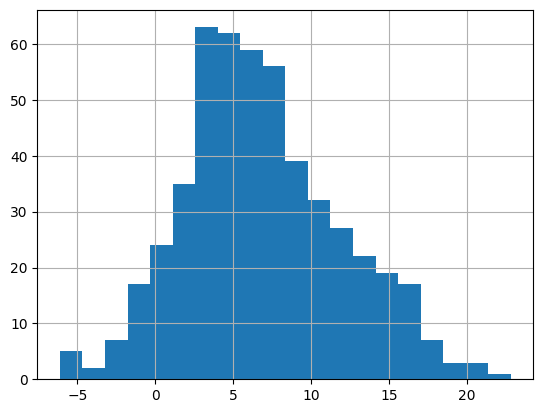

In [11]:
import matplotlib.pyplot as plt

sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [16]:
import pingouin as pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, paired=False, alternative='two-sided')

# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [17]:
pingouin.ttest(x=sample_dem_data['dem_percent_12'],
               y=sample_dem_data['dem_percent_16'],
               alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0
